In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
cols= ['text', 'logical_fallacies', 'dataset', 'source']
df = pd.DataFrame(columns= cols)

In [3]:
df_1 = pd.read_csv('../data/cleaned/1_logicClimate.csv')
df_2 = pd.read_csv('../data/cleaned/2_Huggingface_dataset.csv', index_col=0)
df_3 = pd.read_csv('../data/cleaned/3_CoCoLoFa_merged.csv')
df_4 = pd.read_csv('../data/cleaned/4_falcon_df_multilabel_annotations.csv')
df_5_1 = pd.read_csv('../data/cleaned/5_climate.csv')
df_5_2 = pd.read_csv('../data/cleaned/5_covid.csv')
# df_6 = pd.read_csv('../data/cleaned/1_logicClimate.csv')
# df_7 = pd.read_csv('../data/cleaned/7_Reddit_dataset.csv', index_col=0) #identical to 4
df_8 = pd.read_csv('../data/cleaned/8_argotario.csv')
df_9 = pd.read_csv('../data/cleaned/9_Goffredo_used_in_MAFALDA_cleaned.csv')

In [4]:

df_1['dataset']=1
df_1 = df_1.rename(columns={ 'original_url': 'source', 'source_article': 'text'})
df_1 = df_1.loc[:,cols ]
df_1.head()

,text,logical_fallacies,dataset,source
0,"In June last year , a severe heatwave claimed ...",intentional,1,https://www.theguardian.com/environment/2016/a...
1,Diminishing sea ice is causing major walrus he...,intentional,1,https://www.theguardian.com/environment/2016/a...
2,A landmark report from the United Nations ’ sc...,fallacy of credibility,1,https://www.nytimes.com/2018/10/07/climate/ipc...
3,"The report “ is quite a shock , and quite conc...",fallacy of credibility,1,https://www.nytimes.com/2018/10/07/climate/ipc...
4,The World Coal Association disputed the conclu...,false dilemma,1,https://www.nytimes.com/2018/10/07/climate/ipc...


In [5]:

df_2['dataset']=2
df_2 = df_2.rename(columns={ 'statement': 'text', 'label': 'logical_fallacies'})
df_2 = df_2.loc[:,['text', 'logical_fallacies', 'dataset']]
df_2.head()

,text,logical_fallacies,dataset
0,"The book is popular because it's good, and it'...",circular reasoning,2
1,"This policy is effective because it's popular,...",circular reasoning,2
2,I know that our TV advertisements are more eff...,faulty generalization,2
3,"President Trump , who in the past has called g...",intentional,2
4,A commercial shows a group of friends all hang...,ad populum,2


In [6]:
df_3 = df_3[['fallacy', 'comment']]
df_3 = df_3.rename(columns={'fallacy':'logical_fallacies', 'comment': 'text' })
df_3['dataset'] = 3
df_3 = df_3.loc[:,['text', 'logical_fallacies', 'dataset']]
df_3.head()

,text,logical_fallacies,dataset
0,Lack of transparency in government isn't unexp...,none,3
1,While the issues discussed here should be addr...,appeal to authority,3
2,The excuse that Brazilian municipalities do no...,none,3
3,This is what's to be expected of developing an...,none,3
4,"Sad to say, I have to agree with you. Rulers c...",appeal to tradition,3


In [7]:
df_4.columns

Index(['annotator', 'fallacy', 'id', 'lead_time', 'main_tweet', 'new_id',
       'posterior_context', 'previous_context', 'updated_at', 'Ad Hominem',
       'Appeal to Fear', 'Appeal to Ridicule', 'False Dilemma',
       'Hasty Generalization', 'Loaded Language', 'None of the above',
       'component_id'],
      dtype='object')

In [8]:
df_4 = df_4[['main_tweet', 'Ad Hominem','Appeal to Fear', 'Appeal to Ridicule', 'False Dilemma','Hasty Generalization', 'Loaded Language', 'None of the above']]
df_4 = df_4.rename(columns={'main_tweet': 'text' })
df_4['dataset'] = 4
df_4 = df_4.loc[:,['dataset', 'text', 'Ad Hominem','Appeal to Fear', 'Appeal to Ridicule', 'False Dilemma','Hasty Generalization', 'Loaded Language', 'None of the above']]
df_4.head()

,dataset,text,Ad Hominem,Appeal to Fear,Appeal to Ridicule,False Dilemma,Hasty Generalization,Loaded Language,None of the above
0,4,[main_tweet] [user104337]: @user @user ... @us...,0,0,0,0,0,0,1
1,4,[main_tweet] [user79987]: @user @user ... @use...,0,0,0,0,0,0,1
2,4,[main_tweet] [user104337]: @user @user ... @us...,0,0,0,0,0,0,1
3,4,[main_tweet] [user79987]: @user @user ... @use...,1,0,0,0,0,1,0
4,4,[main_tweet] [user47446]: @user @user ... @use...,0,0,0,0,0,0,1


In [9]:
df_5_1.head()

,fact_checked_segment,comment_by_fact-checker,article,logical_fallacies
0,“climate economists see a positive externality...,This is cherry-picking at its worst. You can a...,article36.txt,Cherry Picking
1,The latest U.N. science compendium asserts tha...,The recent US National Climate Assessment1 fin...,article130.txt,Cherry Picking
2,"“‘If we are right, our study challenges decade...",It only potentially challenges ONE method used...,NaN,Cherry Picking
3,“a killer analysis conducted by Craig Idso of ...,"This publication is not peer-reviewed, cherry-...",article45.txt,Cherry Picking
4,"“Next year or the year after that, I think it ...",I would also add that predictions of an ice-fr...,article33.txt,Cherry Picking


In [10]:
df_5_1 = df_5_1[['fact_checked_segment', 'logical_fallacies', 'article']]
df_5_1 = df_5_1.rename(columns={'fact_checked_segment': 'text', 'article': 'source'})
df_5_1['dataset'] = 5
df_5_1 = df_5_1.loc[:,['dataset', 'text', 'logical_fallacies', 'source']]
df_5_1.head()

,dataset,text,logical_fallacies,source
0,5,“climate economists see a positive externality...,Cherry Picking,article36.txt
1,5,The latest U.N. science compendium asserts tha...,Cherry Picking,article130.txt
2,5,"“‘If we are right, our study challenges decade...",Cherry Picking,NaN
3,5,“a killer analysis conducted by Craig Idso of ...,Cherry Picking,article45.txt
4,5,"“Next year or the year after that, I think it ...",Cherry Picking,article33.txt


In [11]:
df_5_2.head()

df_5_2 = df_5_2[['claim', 'logical_fallacies']]
df_5_2 = df_5_2.rename(columns={'claim': 'text' })
df_5_2['dataset'] = 5
df_5_2 = df_5_2.loc[:,['dataset', 'text', 'logical_fallacies']]
df_5_2.head()


,dataset,text,logical_fallacies
0,5,"In November 2020, Ticketmaster announced that ...",Cherry Picking
1,5,Says that “the way to reach ‘herd immunity’ is...,Cherry Picking
2,5,The public won’t be able to claim compensation...,Cherry Picking
3,5,“vaccinated children appear to be significantl...,Cherry Picking
4,5,The WHO now says a child’s presence in school ...,Cherry Picking


In [12]:
df_8.head()
df_8 = df_8.dropna()
df_8 = df_8.rename(columns={'claim': 'text' })
df_8['dataset'] = 8
df_8 = df_8.loc[:,['dataset', 'text', 'logical_fallacies']]
df_8.head()

,dataset,text,logical_fallacies
0,8,"No, imagine you were a teacher and everybody w...",Appeal to Emotion
1,8,"The moon is so far away, we should focus on ou...",Red Herring
2,8,"The green party in Germany has the opinion, th...",Irrelevant Authority
3,8,"No, not at all. Nowadays kids spend all time p...",Red Herring
4,8,"Yes, whoever drinks and drives has a bad reac...",No Fallacy


In [13]:
df_9 = df_9[['text', 'fallacy']]
df_9 = df_9.rename(columns={'fallacy': 'logical_fallacies' })
df_9['dataset'] = 9
df_9 = df_9.loc[:,['dataset', 'text', 'logical_fallacies']]
df_9.head()

,dataset,text,logical_fallacies
0,9,"And I think you get a certain arrogance, burea...",Ad Hominem
1,9,Bill Clinton simply has trouble telling the tr...,Ad Hominem
2,9,he has a long record of engaging in racist beh...,Ad Hominem
3,9,she's got no business ability,Ad Hominem
4,9,she doesn't have that,Ad Hominem


In [14]:

def adjust_encode(data):
    data['logical_fallacies']=data['logical_fallacies'].map(lambda x: x.lower().replace(' ', '_'))
    data = pd.get_dummies(data, columns=['logical_fallacies'])
    data = data.replace({False: 0, True: 1})
    return data

df_1 = adjust_encode(df_1)
df_2 = adjust_encode(df_2)
df_3 = adjust_encode(df_3)
df_5_1 = adjust_encode(df_5_1)
df_5_2= adjust_encode(df_5_2)
# df_6 = adjust_encode(df_6)
df_8 = adjust_encode(df_8)
df_9 = adjust_encode(df_9)

In [15]:
df_4.columns
df_4 = df_4.rename(columns={'Ad Hominem':'logical_fallacies_ad_hominem', 'Appeal to Fear':'logical_fallacies_appeal_to_fear', 'Appeal to Ridicule': 'logical_fallacies_appeal_to_ridicule',
       'False Dilemma': 'logical_fallacies_false_dilemma', 'Hasty Generalization':'logical_fallacies_hasty_generalization', 'Loaded Language': 'logical_fallacies_loaded_language',
       'None of the above': 'logical_fallacies_none'})

In [16]:
dfList = [df_1, df_2, df_3, df_4 ,df_5_1, df_5_2, df_8, df_9]
for d in dfList:
    print (d.columns)


Index(['text', 'dataset', 'source', 'logical_fallacies_ad_hominem',
       'logical_fallacies_ad_populum', 'logical_fallacies_appeal_to_emotion',
       'logical_fallacies_circular_reasoning',
       'logical_fallacies_equivocation',
       'logical_fallacies_fallacy_of_credibility',
       'logical_fallacies_fallacy_of_extension',
       'logical_fallacies_fallacy_of_logic',
       'logical_fallacies_fallacy_of_relevance',
       'logical_fallacies_false_causality', 'logical_fallacies_false_dilemma',
       'logical_fallacies_faulty_generalization',
       'logical_fallacies_intentional'],
      dtype='object')
Index(['text', 'dataset', 'logical_fallacies_ad_hominem',
       'logical_fallacies_ad_populum', 'logical_fallacies_appeal_to_emotion',
       'logical_fallacies_circular_reasoning',
       'logical_fallacies_equivocation',
       'logical_fallacies_fallacy_of_credibility',
       'logical_fallacies_fallacy_of_extension',
       'logical_fallacies_fallacy_of_logic',
       'log

In [17]:
df = pd.concat([df_1, df_2, df_3, df_4, df_5_1, df_5_2, df_8, df_9])
df

,text,dataset,source,logical_fallacies_ad_hominem,logical_fallacies_ad_populum,logical_fallacies_appeal_to_emotion,logical_fallacies_circular_reasoning,logical_fallacies_equivocation,logical_fallacies_fallacy_of_credibility,logical_fallacies_fallacy_of_extension,...,logical_fallacies_false_analogy,logical_fallacies_false_authority,logical_fallacies_false_cause,logical_fallacies_no_fallacy,logical_fallacies_post_hoc,logical_fallacies_red_herring,logical_fallacies_strawman,logical_fallacies_vagueness,logical_fallacies_irrelevant_authority,logical_fallacies_slogans
0,"In June last year , a severe heatwave claimed ...",1,https://www.theguardian.com/environment/2016/a...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Diminishing sea ice is causing major walrus he...,1,https://www.theguardian.com/environment/2016/a...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,A landmark report from the United Nations ’ sc...,1,https://www.nytimes.com/2018/10/07/climate/ipc...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,"The report “ is quite a shock , and quite conc...",1,https://www.nytimes.com/2018/10/07/climate/ipc...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,The World Coal Association disputed the conclu...,1,https://www.nytimes.com/2018/10/07/climate/ipc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1670,separation of church and state,9,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1671,Our character is on the ballot,9,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1672,Show up and vote,9,NaN,0.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,1.0
1673,I don't believe that Hillary has the stamina.,9,NaN,1.0,NaN,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0


In [22]:
fallacies = df.columns.drop(['dataset','text', 'source'])
fallacies

df_fallacies = pd.DataFrame()
df_fallacies['fallacies'] = fallacies

fallacies_count = []
for f in fallacies:
    fallacies_count.append(df[f].sum())

df_fallacies['count_true'] = fallacies_count
df_fallacies

,fallacies,count_true
0,logical_fallacies_ad_hominem,1238.0
1,logical_fallacies_ad_populum,483.0
2,logical_fallacies_appeal_to_emotion,1741.0
3,logical_fallacies_circular_reasoning,256.0
4,logical_fallacies_equivocation,222.0
5,logical_fallacies_fallacy_of_credibility,397.0
6,logical_fallacies_fallacy_of_extension,382.0
7,logical_fallacies_fallacy_of_logic,369.0
8,logical_fallacies_fallacy_of_relevance,499.0
9,logical_fallacies_false_causality,534.0


In [25]:
df_fallacies.sort_values(by='count_true', ascending=False)

,fallacies,count_true
19,logical_fallacies_none,4720.0
2,logical_fallacies_appeal_to_emotion,1741.0
0,logical_fallacies_ad_hominem,1238.0
10,logical_fallacies_false_dilemma,1037.0
12,logical_fallacies_intentional,927.0
11,logical_fallacies_faulty_generalization,802.0
18,logical_fallacies_hasty_generalization,760.0
29,logical_fallacies_no_fallacy,699.0
13,logical_fallacies_appeal_to_authority,677.0
20,logical_fallacies_slippery_slope,631.0


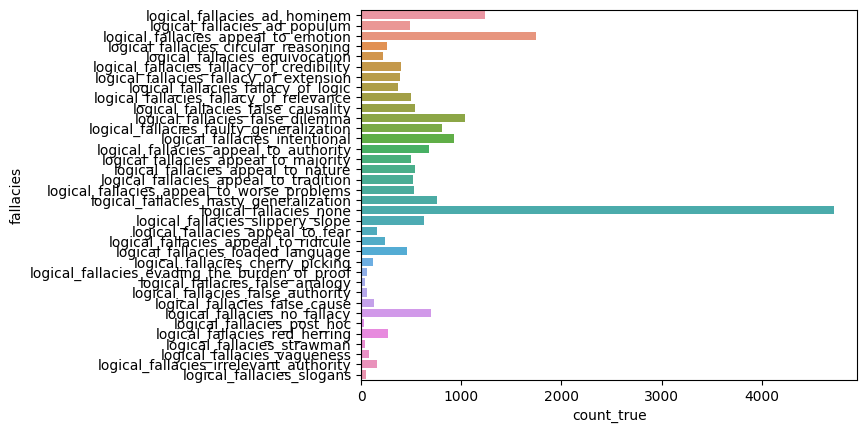

In [27]:
sns.barplot(data = df_fallacies, y = 'fallacies', x ='count_true')
plt.show()